In [2]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
GOOGLE_API_KEY=os.getenv("GOOGLE_API_KEY")
TAVILY_API_KEY=os.getenv("TAVILY_API_KEY")
GROQ_API_KEY=os.getenv("GROQ_API_KEY")
LANGCHAIN_API_KEY=os.getenv("LANGCHAIN_API_KEY")
LANGCHAIN_PROJECT=os.getenv("LANGCHAIN_PROJECT")

In [4]:
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY
os.environ["TAVILY_API_KEY"] = TAVILY_API_KEY
os.environ["GROQ_API_KEY"]= GROQ_API_KEY
os.environ["LANGCHAIN_API_KEY"] = LANGCHAIN_API_KEY
os.environ["LANGCHAIN_TRACING_V2"] = "false"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGCHAIN_PROJECT"]=LANGCHAIN_PROJECT

In [5]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [7]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash-latest")

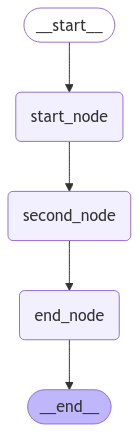

In [12]:
from langchain_core.messages import HumanMessage
from langgraph.graph import END, MessageGraph
import time

def add_one(input: list[HumanMessage]):
    input[0].content = input[0].content + "a"
    return input

graph = MessageGraph()
graph.add_node("start_node",add_one)
graph.add_node("second_node",add_one)
graph.add_node("end_node",add_one)

graph.add_edge("start_node","second_node")
graph.add_edge("second_node","end_node")
graph.add_edge("end_node",END)

graph.set_entry_point("start_node")

runnable = graph.compile()

from IPython.display import Image, display

display(Image(runnable.get_graph().draw_mermaid_png()))


In [13]:
runnable.invoke("a")

[HumanMessage(content='aaaa', additional_kwargs={}, response_metadata={}, id='3ea016d4-1144-4418-bcef-5aac151354a6')]